In [71]:
# Make the output of plotting commands be displayed inline within the notebook
# Basemap: https://anaconda.org/conda-forge/basemap
# Pygrib: https://anaconda.org/conda-forge/pygrib
# If throws error for outdated libpng use conda install -c conda-forge libpng

%matplotlib inline 
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import pygrib # import pygrib interface to grib_api

In [2]:
# Open the grib file
grbs = pygrib.open('/Users/villehak/Work/iceML/ice-data/icedata_2018-03-23T08-54-45_next_6hours.grb2')

In [3]:
for grb in grbs:
    print(grb)

1:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 1 hrs:from 201803230000
2:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 2 hrs:from 201803230000
3:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 3 hrs:from 201803230000
4:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 4 hrs:from 201803230000
5:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 5 hrs:from 201803230000
6:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 6 hrs:from 201803230000
7:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 7 hrs:from 201803230000
8:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 8 hrs:from 201803230000
9:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 9 hrs:from 201803230000
10:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 10 hrs:from 201803230000
11:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst tim

In [4]:
grb.keys()

['parametersVersion',
 'UseEcmfConventions',
 'GRIBEX_boustrophedonic',
 'hundred',
 'globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatest',
 'grib2divider',
 'angularPrecision',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'section3Length',
 'numberOfSection',
 'sourceOfGridDefinition',
 'numberOfDataPoints',
 'numberOfOctectsForNu

In [18]:
grbs.rewind() # rewind the iterator
def grb_to_grid(grb_obj):
    """Takes a single grb object containing multiple
    levels. Assumes same time, pressure levels. Compiles to a cube"""
    n_levels = len(grb_obj)
    levels = np.array([grb_element['level'] for grb_element in grb_obj])
    indexes = np.argsort(levels)[::-1] # highest pressure first
    cube = np.zeros([n_levels, grb_obj[0].values.shape[0], grb_obj[1].values.shape[1]])
    for i in range(n_levels):
        cube[i,:,:] = grb_obj[indexes[i]].values
    cube_dict = {'data' : cube, 'units' : grb_obj[0]['units'],
                 'levels' : levels[indexes]}
    return cube_dict

In [19]:
grb = grbs.select(name='Sea-ice cover')
grb_concentration = grb_to_grid(grb)

In [21]:
print(grb_concentration['units'])
print(grb_concentration['levels'][10])

(0 - 1)
0


In [41]:
grbs.rewind() # rewind the iterator
from datetime import datetime
concentrations = []
for grb in grbs:
    if grb.name == 'Sea-ice cover': 
        concentrations.append(grb.values)
concentrations = np.array(concentrations)
print (icethicknesses.shape, icethicknesses.min(), icethicknesses.max(), np.mean(icethicknesses))
lats, lons = grb.latlons()  # get the lats and lons for the grid.
print ('min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max())
print(grb_concentration['data'][0])

(52, 541, 408) 0.0 9999.0 6517.48913373
min/max lat and lon 56.992486 66.009946 16.717 30.315126
[[  1.99999809e-02   6.44999981e-01   1.80000067e-02 ...,   9.99900000e+03
    9.99900000e+03   9.99900000e+03]
 [  2.40000486e-02   7.61999965e-01   0.00000000e+00 ...,   9.99900000e+03
    9.99900000e+03   9.99900000e+03]
 [  9.99999046e-03   3.17999959e-01   1.00004673e-03 ...,   9.99900000e+03
    9.99900000e+03   9.99900000e+03]
 ..., 
 [  9.99900000e+03   9.99900000e+03   9.99900000e+03 ...,   9.99900000e+03
    9.99900000e+03   9.99900000e+03]
 [  9.99900000e+03   9.99900000e+03   9.99900000e+03 ...,   9.99900000e+03
    9.99900000e+03   9.99900000e+03]
 [  9.99900000e+03   9.99900000e+03   9.99900000e+03 ...,   9.99900000e+03
    9.99900000e+03   9.99900000e+03]]


In [60]:
max_cmr = grb_concentration['data'].max(axis=0)
print(max_cmr.shape)
print (max_cmr.shape, max_cmr.min(), max_cmr.max(), np.mean(max_cmr))
grb_concentration

(541, 408)
(541, 408) 0.0 9999.0 6517.5095191


{'data': array([[[  1.99999809e-02,   6.44999981e-01,   1.80000067e-02, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  2.40000486e-02,   7.61999965e-01,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  9.99999046e-03,   3.17999959e-01,   1.00004673e-03, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         ..., 
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00]],
 
        [[  1.99999809e-02,   6.53000116e-01,   1.80000067e-02, ...,
            9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
         [  2.40000486e-02,   7.6199

In [84]:
##test = grb_concentration['data'][0]
##test[test == 9999.0] = 0
##print(test.shape)
##np.trim_zeros(test)
##print(test_nozeros.shape)

(541, 408)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

/Users/villehak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  


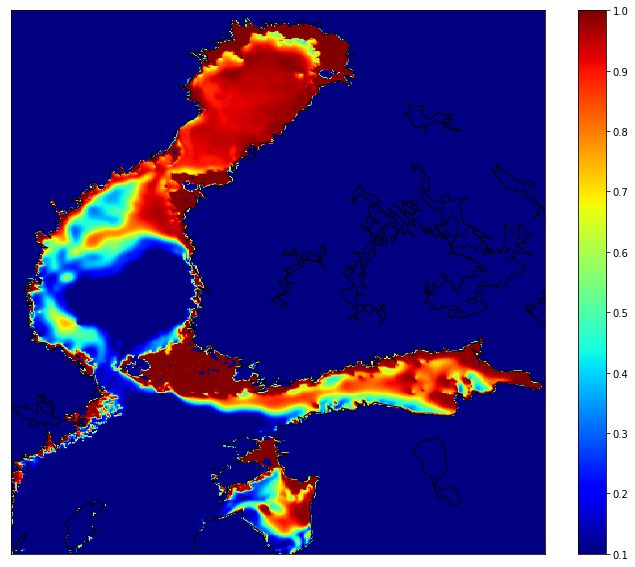

In [82]:
f = plt.figure(figsize=[12,10])
m = Basemap(llcrnrlon = lons.min(),llcrnrlat = lats.min(), urcrnrlon = lons.max(),
           urcrnrlat = lats.max(),
           projection = 'mill', area_thresh =1000 ,
           resolution='l')
x, y = m(lons, lats)
palette = plt.cm.jet
palette.set_bad(ax.get_axis_bgcolor(), 1.0)
my_mesh = m.pcolor(x, y, grb_concentration['data'][0], vmin=0.1,vmax=1, cmap=palette)
my_coast = m.drawcoastlines(linewidth=1.)
plt.colorbar()

In [11]:
icethicknesses.peek()

AttributeError: 'numpy.ndarray' object has no attribute 'peek'